# Sublytical
This is a reddit analysis tool. For now, its mainly used to practice python, getting a grasp about analytics and taking some early steps into the realm of machine learning.

## Storing Credentials
In my first setup, I was using a `.env` file to store my credentials. To read the contents of that file I used the `os` module in conjunction with `load_dotenv()`. With that I was able to make us of those environmental variables.

I later realized, that PRAW is making use of its own `praw.ini` file, so why not make use of that?
Its realy straight forward. PRAW is using its default `praw.ini` file and we can change different options as we wish by simply creating our own `praw.ini` file in our current working directory.

In that `praw.ini` file, I put in my credentials, leading whit a header in the form of `[bot1]` to let PRAW know which credentials it is supposed to use.

Here a example of how my file is looking:

In [28]:
# [bot1]
# client_id=<CLIENT_ID>
# client_secret=<CLIENT_SECRET>
# bot_name=MybBot
# bot_version=0.0.1
# bot_author=Raybawn
# user_agent=script:%(bot_name)s:v%(bot_version)s (by u/%(bot_author)s)

## PRAW
My first step was to instantiate an reddit instant. With the previously setup `praw.ini` I can do exactly that with only two lines of code:

In [29]:
# Import dependencies
import praw

# Instantiate
reddit = praw.Reddit("bot1", config_interpolation="basic")

## Initializing Variables
As a first step, I'll define my variables. To let the user decide for what subreddit he wants a analysis, I use a simple input prompt for the moment.

In [30]:
userinput = input("Enter subreddit:")
subreddit = reddit.subreddit("all") if not userinput else reddit.subreddit(userinput)

postLimit = 100
postList = []
wordList = []
postWords = []
wordString = ""

## Collect and cleane the data
`nltk` is the "Natural Language Toolkit" and is used to tokenize and filter text. To remove emojis, we can use the `emoji` module.

`matplotlib` is used to visualize the data we got.

Now I want to save the posts titles into `postList`. Additionally I want to have all unique words for each title, without stopwords, emojis and specialcharacters in a separate variable, this time a simple String. This will be used for a visualization later on.

In [31]:
import re
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

for submission in subreddit.hot(limit=postLimit):
    postList.append([submission.title])
    postWords = list(
        set(word_tokenize(submission.title.lower().replace("'", "")))
    )
    wordList.extend(postWords)

stops = set(stopwords.words("english")) # Filter out stopwords (the, a, is, etc.)
nonPunct = re.compile(".*[A-Za-z0-9].*") # Filter out non-alphanumeric characters
def remove_emoji(str):
    return emoji.replace_emoji(str, replace='') # Filter out emojis

wordList = [remove_emoji(w) for w in wordList if not w in stops and nonPunct.match(w)]

for word in wordList:
    wordString += str(word + " ")
    
wordString = wordString[:-1]

print(wordString)


guide mega seasonal get fast powerlevel favourite season build class everyones 3 diablo servers kadala fault… sometimes someone guides please ruin max check roll primal new players let chat gr143 death cheat lod 1000 wol season hardcore 28 solo cap monk paragon clear lag playing deal groups immense guys folks code 1 code searching 24004 problem public game error code 1 games joining earlier yet best season today finished days times 7 day chiltara 25 farmed grift god optimize pushing dh lottery buy ticket today think rasha build tal speed maxroll gr happening something missing game create able anyone games join searching code problem public 24004 game challenge weeks trash rift rites altar glitch unit absolute executioner love chat servers popularity rasha core tal build console primal recipe smoldering players comet build tal rashas optimizing properly little need help challenge 298 guide rift eu hope time guide living terdfergusens unscheduled kills game looking playstation boost bots

## Visualize
For some fun I wanted to create a wordcloud with the above returned words.

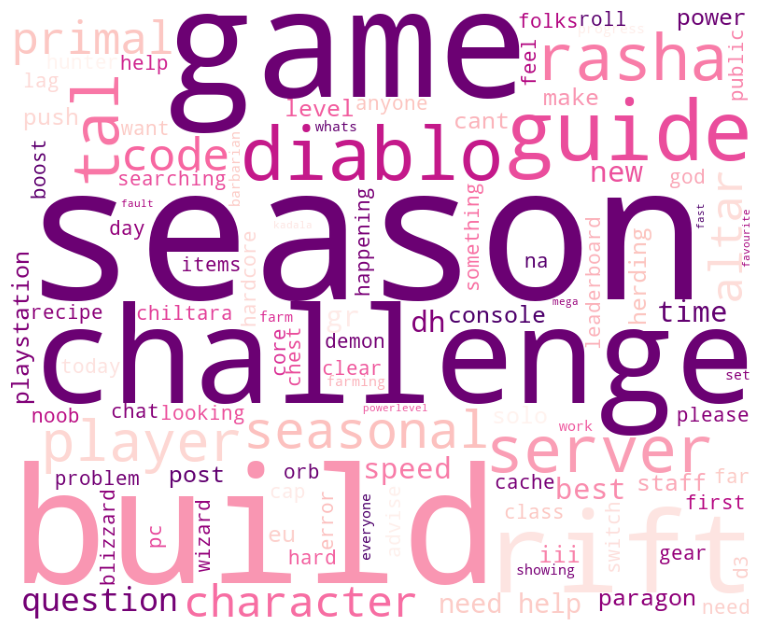

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# import pandas as pd
# from PIL import Image

wc = WordCloud(background_color="white",
               max_words=100,
               width=800,
               height=660,
               colormap='RdPu',
               contour_color='black',
               contour_width=1,
               collocations=True)
wc.generate(wordString)

plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

To let users input their own subreddits, I need a GUI. Because I wanna be able to use it everywhere, and also want to enable other people to use it, I'll create a website with Flask.

In [33]:
# from flask import Flask

# # app.py
# app = Flask(__name__)

# @app.route("/")
# def hello_world():
#     return "Hello, World!"